### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. Import the necessary packages - 2.5 marks

In [45]:
#dataframe = pd.read_csv("Data.csv")
itemframe = pd.read_csv("item.csv")
#userframe = pd.read_csv("user.csv")

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [20]:
dataframe.info()
dataframe.describe()
dataframe.isnull().sum()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1677,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1679,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
#itemframe.loc[:,"unknown":"Western"].head()
#itemframe['Documentary'].value_counts()

movie id        1681
movie title     1681
release date    1681
unknown         1681
Action          1681
Adventure       1681
Animation       1681
Childrens       1681
Comedy          1681
Crime           1681
Documentary     1681
Drama           1681
Fantasy         1681
Film-Noir       1681
Horror          1681
Musical         1681
Mystery         1681
Romance         1681
Sci-Fi          1681
Thriller        1681
War             1681
Western         1681
dtype: int64

#### 4. Find the number of movies per genre using the item data - 5 marks

In [96]:
itemframe.loc[:,"unknown":"Western"].sum(axis=0)

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [108]:
#itemframe['movie title']
genre_plusone = itemframe["movie title"].where(itemframe.loc[:,"unknown":"Western"].sum(axis=1) > 1).dropna()
#hint: use sum on the axis = 1
genre_plusone.count()
genre_plusone

0               Toy Story 
1               GoldenEye 
3              Get Shorty 
4                 Copycat 
6          Twelve Monkeys 
               ...        
1667    MURDER and murder 
1668              Tainted 
1671               Mirage 
1677            B. Monkey 
1678        Sliding Doors 
Name: movie title, Length: 849, dtype: object

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [153]:
unknown_movie = itemframe.where(itemframe['unknown']>0).dropna()
#itemframe = itemframe2.copy()
itemframe.drop(unknown_movie.index[0:],axis=0, inplace=True)
itemframe['unknown'].value_counts()

0    1680
Name: unknown, dtype: int64

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [181]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


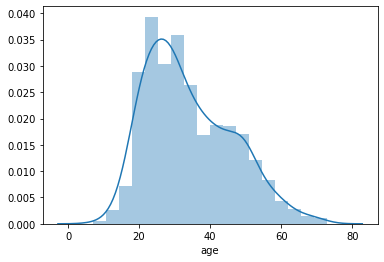

In [164]:
sns.distplot(userframe['age']);

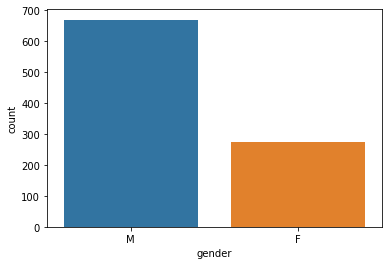

In [168]:
sns.countplot(x = 'gender', data=userframe)

In [ ]:
sns.countplot(x='rating', data=dataframe)

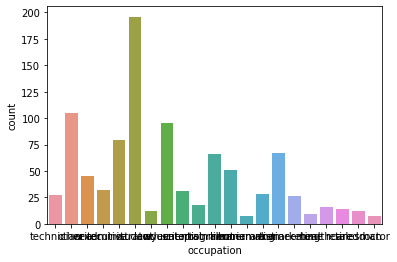

In [220]:
sns.countplot(x='occupation',data=userframe);

In [205]:
#itemframe['release date'].head()
year = itemframe['release date'].str.split("-",n=-1,expand=True)

In [210]:
itemframe["Year"] = year[2]

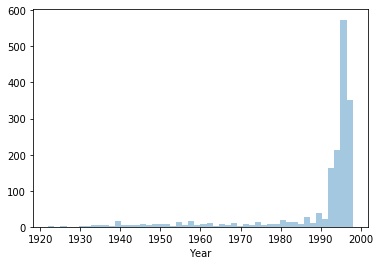

In [214]:
sns.distplot(itemframe["Year"],kde=False);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

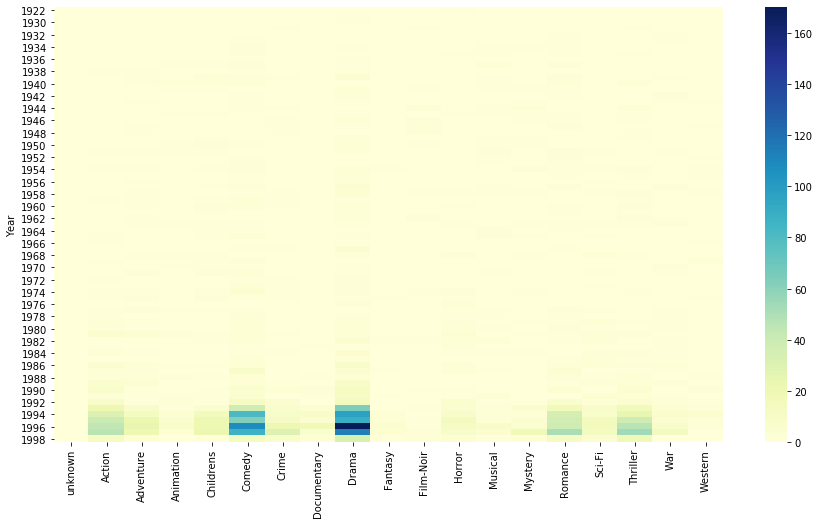

In [349]:
#Your answer here
genre_popularity = itemframe.groupby('Year')[itemframe.columns[3:22]].sum()
#itemframe['Comedy'].where(itemframe['Year']=="1998").sum()
plt.figure(figsize=(15,8))
sns.heatmap(genre_popularity,cmap="YlGnBu");

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [443]:
#your answer here
#userframe.info()
#dataframe.info()
movie_rating = dataframe.groupby('movie id')['rating'].count()
movie_rating = movie_rating.where(movie_rating > 100).dropna()
#movie_rating2 = movie_rating.isin(movie_rating >100)
itemframe.merge(movie_rating,on='movie id').head(25).sort_values(by=['rating'],ascending=False)
#itemframe.merge(movie_rating2,left_on='movie id',right_on='movie id').head(25).sort_values(by=['rating'],ascending=False)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,rating
22,50,Star Wars,01-Jan-1977,0,1,1,0,0,0,0,...,0,0,0,1,1,0,1,0,1977,583.0
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1995,452.0
3,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1995,392.0
5,9,Dead Man Walking,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1995,299.0
11,22,Braveheart,16-Feb-1996,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1996,297.0
14,25,"Birdcage, The",08-Mar-1996,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1996,293.0
10,15,Mr. Holland's Opus,29-Jan-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1996,293.0
15,28,Apollo 13,01-Jan-1995,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995,276.0
7,12,"Usual Suspects, The",14-Aug-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1995,267.0
6,11,Seven (Se7en),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1995,236.0


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [461]:
gender_dist = dataframe.merge(userframe,on='user id').merge(itemframe,on='movie id')
gender_dist.groupby('gender')['Drama'].sum()
#itemframe.head()


gender
F    11008
M    28887
Name: Drama, dtype: int64

* Men watch more drama than women is TRUE

In [465]:
gender_dist.groupby('gender')['Sci-Fi'].sum()

gender
F     2629
M    10101
Name: Sci-Fi, dtype: int64

* Women watch more Sci-Fi than men is FALSE

In [466]:
gender_dist.groupby('gender')['Romance'].sum()

gender
F     5858
M    13603
Name: Romance, dtype: int64

* Men watch more Romance than women

In [471]:
gender_dist.groupby('gender')['rating','Romance','Sci-Fi','Drama'].sum()

/Users/adewa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,rating,Romance,Sci-Fi,Drama
gender,,,,
F,90894,5858,2629,11008
M,262060,13603,10101,28887
